In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import fashion_mnist
(train_input, train_target), (test_input, test_target) = fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [2]:
def model_fn(a_layer=None):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28,28)))
  model.add(keras.layers.Dense(100, activation='relu'))
  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10, activation='softmax'))
  return model

In [3]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

In [4]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

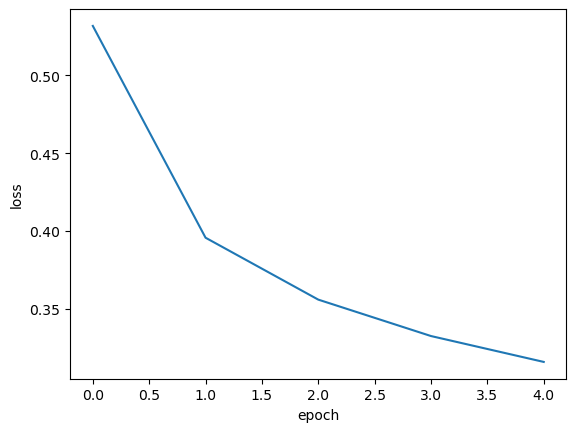

In [5]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

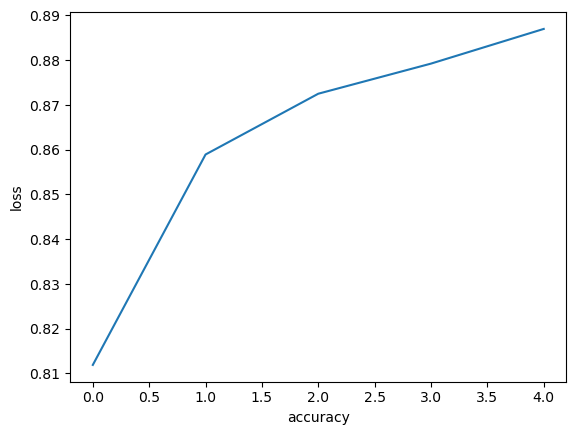

In [6]:

plt.plot(history.history['accuracy'])
plt.xlabel('accuracy')
plt.ylabel('loss')
plt.show()

In [13]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target))
history.history.keys()

Epoch 1/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5314 - accuracy: 0.8120 - val_loss: 0.4569 - val_accuracy: 0.8338
Epoch 2/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3924 - accuracy: 0.8582 - val_loss: 0.3945 - val_accuracy: 0.8590
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3511 - accuracy: 0.8723 - val_loss: 0.3545 - val_accuracy: 0.8732
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3309 - accuracy: 0.8806 - val_loss: 0.3593 - val_accuracy: 0.8733
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3132 - accuracy: 0.8870 - val_loss: 0.3712 - val_accuracy: 0.8722
Epoch 6/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3027 - accuracy: 0.8909 - val_loss: 0.3442 - val_accuracy: 0.8824
Epoch 7/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2957 - accuracy: 0.8954 - val_loss: 0.3679 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

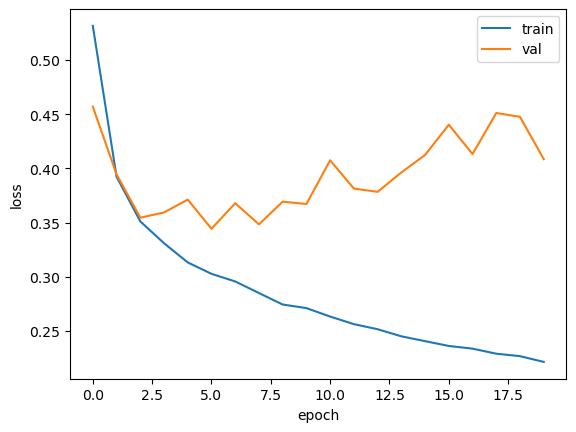

In [14]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

Epoch 1/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5268 - accuracy: 0.8159 - val_loss: 0.4300 - val_accuracy: 0.8495
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3957 - accuracy: 0.8587 - val_loss: 0.4046 - val_accuracy: 0.8558
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3559 - accuracy: 0.8720 - val_loss: 0.3787 - val_accuracy: 0.8619
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3269 - accuracy: 0.8810 - val_loss: 0.3445 - val_accuracy: 0.8765
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3079 - accuracy: 0.8873 - val_loss: 0.3537 - val_accuracy: 0.8748
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2898 - accuracy: 0.8936 - val_loss: 0.3716 - val_accuracy: 0.8604
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2787 - accuracy: 0.8976 - val_loss: 0.3244 - val_accuracy:

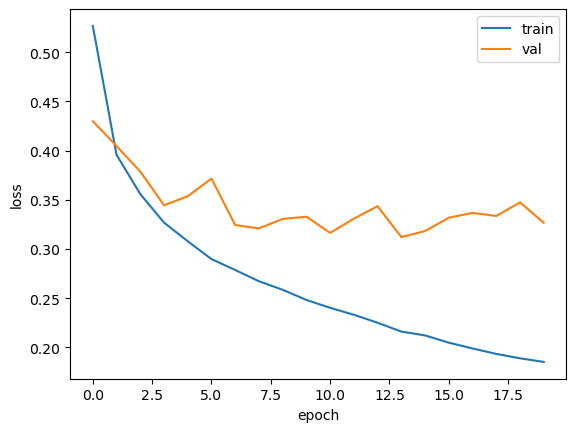

In [15]:
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [7]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5907 - accuracy: 0.7930 - val_loss: 0.4162 - val_accuracy: 0.8511
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4349 - accuracy: 0.8429 - val_loss: 0.3871 - val_accuracy: 0.8590
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4033 - accuracy: 0.8531 - val_loss: 0.3599 - val_accuracy: 0.8683
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3804 - accuracy: 0.8608 - val_loss: 0.3560 - val_accuracy: 0.8702
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3666 - accuracy: 0.8646 - val_loss: 0.3581 - val_accuracy: 0.8726
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3537 - accuracy: 0.8694 - val_loss: 0.3371 - val_accuracy: 0.8785
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3435 - accuracy: 0.8742 - val_loss: 0.3333 - val_accuracy:

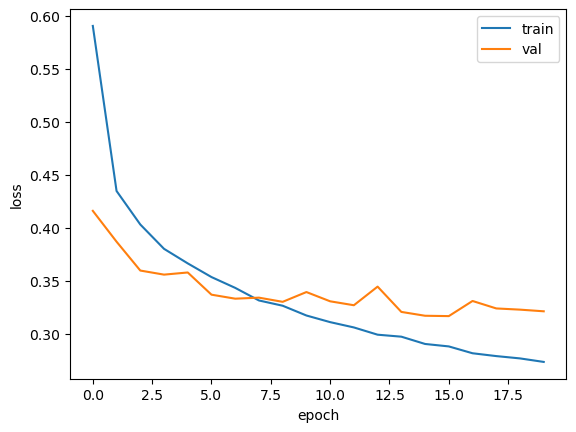

In [18]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [8]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=10, validation_data=(val_scaled, val_target))

Epoch 1/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5887 - accuracy: 0.7938 - val_loss: 0.4261 - val_accuracy: 0.8482
Epoch 2/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4371 - accuracy: 0.8427 - val_loss: 0.3898 - val_accuracy: 0.8600
Epoch 3/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4058 - accuracy: 0.8535 - val_loss: 0.3674 - val_accuracy: 0.8650
Epoch 4/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3816 - accuracy: 0.8594 - val_loss: 0.3714 - val_accuracy: 0.8627
Epoch 5/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3636 - accuracy: 0.8666 - val_loss: 0.3854 - val_accuracy: 0.8592
Epoch 6/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3517 - accuracy: 0.8708 - val_loss: 0.3617 - val_accuracy: 0.8668
Epoch 7/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3427 - accuracy: 0.8745 - val_loss: 0.3298 - val_accuracy:

In [9]:
model.save_weights('model-weight.h5')
model.save('model-whole.h5')

c:\Users\user\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [21]:
!ls -al *.h

'ls'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [10]:
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weight.h5')

In [11]:
import numpy as np
val_labels = np.argmax(model.predict(val_scaled), axis=-1)
np.mean(val_labels == val_target)

375/375 [==============================] - 0s 915us/step


0.87825

In [12]:
model = keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 954us/step - loss: 0.3295 - accuracy: 0.8783


[0.3294972777366638, 0.878250002861023]

In [14]:
from tensorflow.keras.callbacks import ModelCheckpoint
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = ModelCheckpoint('best-mode.h5', save_best_only=True)
model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb])

c:\Users\user\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [16]:
model = keras.models.load_model('best-mode.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 960us/step - loss: 0.3225 - accuracy: 0.8823


[0.3224741518497467, 0.8822500109672546]

In [17]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = ModelCheckpoint('best-mode.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

c:\Users\user\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [18]:
early_stopping_cb.stopped_epoch

8

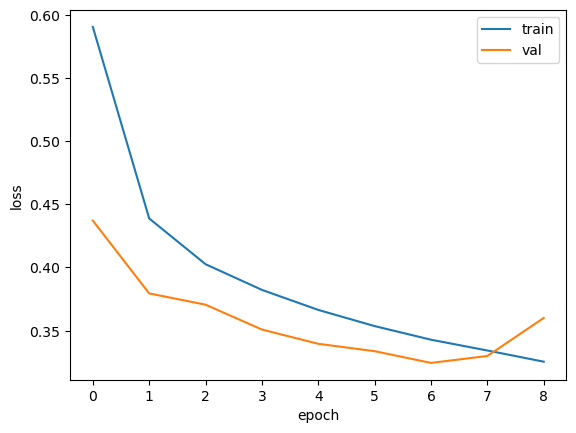

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [20]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 1ms/step - loss: 0.3244 - accuracy: 0.8829


[0.32435810565948486, 0.8829166889190674]